In [1]:
import numpy as np
import skimage.io 
import matplotlib.pyplot as plt 
import os, sys
import pickle
import pandas as pd 
from skimage.registration import phase_cross_correlation
import cv2 
import itertools
from pathlib import Path

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import path 
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

from config import *

In [5]:
csv_file = data_meta / 'all_info.csv'

# Read dataframe containing images information 
df = pd.read_csv(csv_file)

In [6]:
df

,Cycle,Condition,Z_stack,Channel,Marker,Path,Path_corrected
0,2seg,Fw1,1,CH1,DAPI,y:\coskun-lab\Thomas\Spatial signaling pathway...,y:\coskun-lab\Thomas\Spatial signaling pathway...
1,2seg,Fw1,1,CH3,Phalloidin,y:\coskun-lab\Thomas\Spatial signaling pathway...,y:\coskun-lab\Thomas\Spatial signaling pathway...
2,2seg,Fw1,1,CH4,WGA,y:\coskun-lab\Thomas\Spatial signaling pathway...,y:\coskun-lab\Thomas\Spatial signaling pathway...
3,2seg,Fw1,2,CH1,DAPI,y:\coskun-lab\Thomas\Spatial signaling pathway...,y:\coskun-lab\Thomas\Spatial signaling pathway...
4,2seg,Fw1,2,CH3,Phalloidin,y:\coskun-lab\Thomas\Spatial signaling pathway...,y:\coskun-lab\Thomas\Spatial signaling pathway...
...,...,...,...,...,...,...,...
290,CycE,Fw3,Combined,CH3,EMMPRIN,NaN,y:\coskun-lab\Thomas\Spatial signaling pathway...
291,CycE,Fw3,Combined,CH4,WNT-1,NaN,y:\coskun-lab\Thomas\Spatial signaling pathway...
292,DKK1,Fw3,Combined,CH1,DAPI,NaN,y:\coskun-lab\Thomas\Spatial signaling pathway...
293,DKK1,Fw3,Combined,CH2,Non-phospho-B-catenin,NaN,y:\coskun-lab\Thomas\Spatial signaling pathway...


## Get registration result

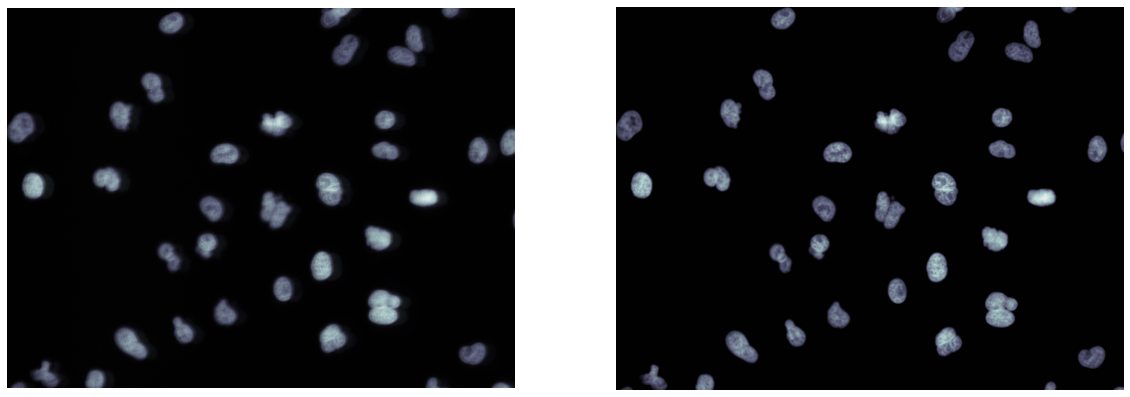

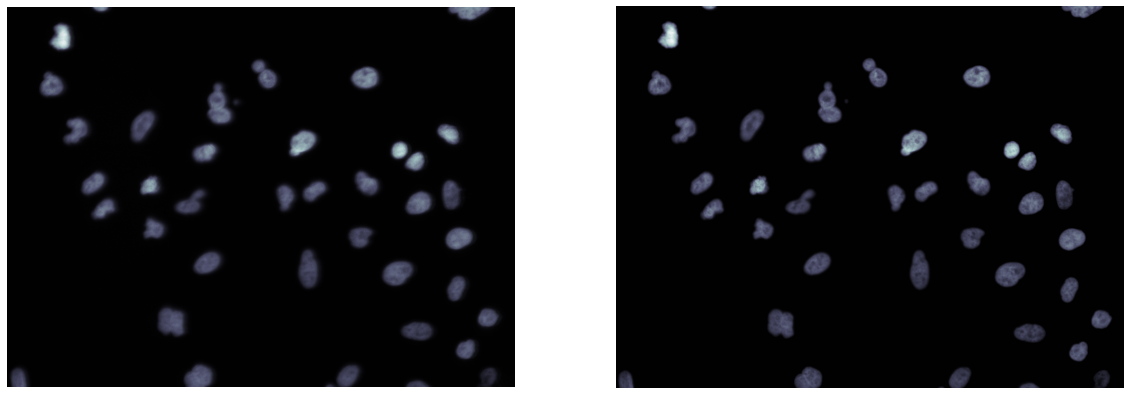

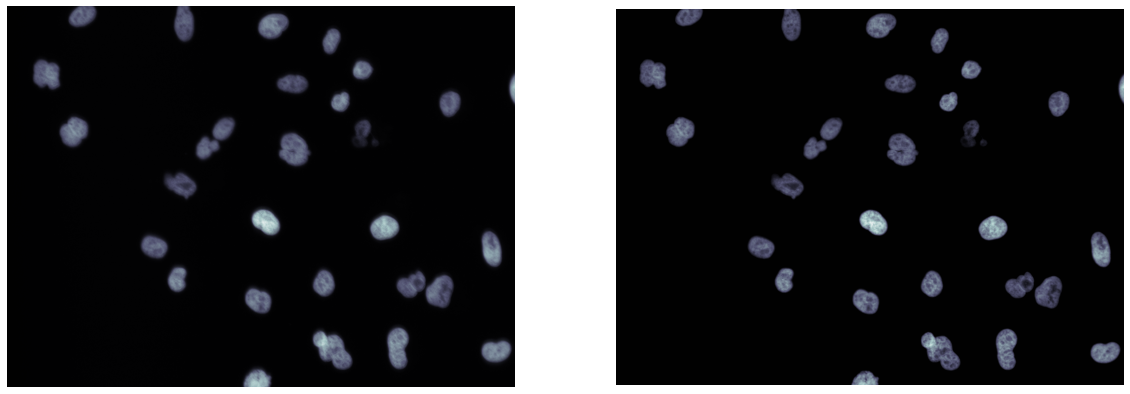

In [30]:
# Get shift between cycle
cycles = df.Cycle.unique()
conditions = df.Condition.unique()

for condition in conditions:
    df_subset = df[(df.Condition == condition) & (df.Channel == 'CH1')]
    
    fig, axs = plt.subplots(1,2)
    for cycle in cycles:
        temp = df_subset[df_subset.Cycle == cycle]
        img_dapi = skimage.io.imread(temp[temp.Z_stack == '1'].Path.item())
        img_dapi_corrected = skimage.io.imread(temp[temp.Z_stack == '1'].Path_corrected.item())

        axs[0].imshow(img_dapi, cmap='bone', alpha=0.6)
        axs[1].imshow(img_dapi_corrected, cmap='bone', alpha=0.6)

    axs[0].axis('off')
    axs[1].axis('off')

    fig.set_size_inches(20, 40)
    fig.savefig(condition+'.png', bbox_inches = 'tight')
    plt.show()
